### 볼린저 밴드 
1. 파일 로드 
2. 결측치와 이상치를 확인 및 제거 
3. 시간과 종가만의 데이터프레임으로 변경
4. 이동 평균선 : 데이터 20개의 평균을 구해서 새로운 파생변수에 대입
5. 상단 밴드 : 이동 평균선 + (2 * 데이터 20개의 표준편차)
6. 하단 밴드 : 이동 평균선 - (2 * 데이터 20개의 표준편차)
7. 구매 상태를 확인하는 파생변수 생성
8. 구매 상태를 입력
9. 수익율 계산

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../csv/BND.csv", index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-10,75.070000,75.260002,75.000000,75.239998,51.523693,35000
2007-04-11,75.160004,75.290001,75.029999,75.040001,51.386742,87700
2007-04-12,75.059998,75.080002,74.959999,75.029999,51.379879,78100
2007-04-13,75.040001,75.070000,74.849998,74.910004,51.297688,18000
2007-04-16,74.989998,74.989998,74.940002,74.980003,51.345627,52700


In [3]:
## 결측치와 이상치를 확인
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [4]:
## 결측치와 이상치를 제외한 데이터 생성
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [5]:
## 시간과 종가만으로 이루어져있는 데이터프레임 생성

# price_df = df.loc[ : , ["Adj Close"]]

price_df = df[["Adj Close"]]

In [7]:
## 이동 평균선
# 데이터양이 20개의 평균을 구해서 새로운 파생변수 대입
# 과거의 데이터의 수가 20개가 되지 않으면 결측치로 출력

price_df["center"] = price_df['Adj Close'].rolling(20).mean()

C:\Users\msi\AppData\Local\Temp\ipykernel_15736\361028203.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df["center"] = price_df['Adj Close'].rolling(20).mean()


In [10]:
price_df.iloc[18:25]

,Adj Close,center
Date,,
2007-05-04,51.679100,NaN
2007-05-07,51.713379,51.556713
2007-05-08,51.720268,51.566542
2007-05-09,51.658497,51.580130
2007-05-10,51.706562,51.596464
2007-05-11,51.637943,51.613477
2007-05-14,51.603649,51.626378


In [11]:
## ub 파생변수를 생성 
## 이동평균선 + (2 * 종가 데이터 20개의 표준편차)
price_df["ub"] = \
    price_df["center"] + ( 2 * price_df["Adj Close"].rolling(20).std() )

C:\Users\msi\AppData\Local\Temp\ipykernel_15736\4078140554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df["ub"] = \


In [12]:
## lb 파생변수 생성
# 이동평균선 - ( 2 * 종가 데이터 20개의 표준편차 )
price_df["lb"] = \
    price_df['center'] - ( 2 * price_df['Adj Close'].rolling(20).std() )

C:\Users\msi\AppData\Local\Temp\ipykernel_15736\1439312759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df["lb"] = \


In [13]:
price_df.iloc[18:25]

,Adj Close,center,ub,lb
Date,,,,
2007-05-04,51.679100,NaN,NaN,NaN
2007-05-07,51.713379,51.556713,51.807910,51.305517
2007-05-08,51.720268,51.566542,51.827492,51.305592
2007-05-09,51.658497,51.580130,51.829713,51.330546
2007-05-10,51.706562,51.596464,51.833301,51.359627
2007-05-11,51.637943,51.613477,51.804375,51.422579
2007-05-14,51.603649,51.626378,51.770106,51.482650


<AxesSubplot:xlabel='Date'>

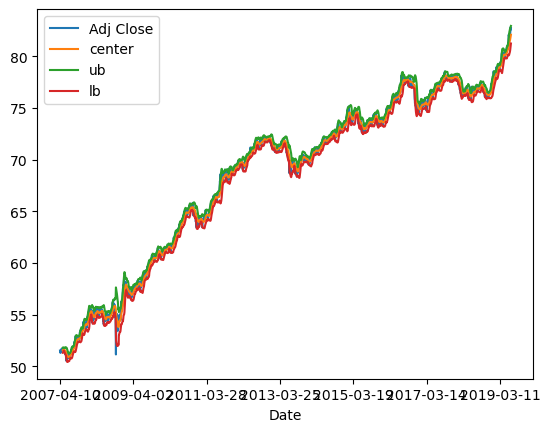

In [14]:
price_df.plot()

In [15]:
## 시작 시간 생성 
start_time = '2010-01-02'
price_df_2 = price_df.loc[start_time:]
price_df_2.head(3)

,Adj Close,center,ub,lb
Date,,,,
2010-01-04,60.611969,60.826958,61.336124,60.317793
2010-01-05,60.789135,60.819153,61.325461,60.312844
2010-01-06,60.766037,60.802128,61.290324,60.313932


In [16]:
## 거래 내역이라는 파생변수 생성
## 비어있는 값을 생성
price_df_2['trade'] = ""
price_df_2.head(2)


C:\Users\msi\AppData\Local\Temp\ipykernel_15736\2196710312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df_2['trade'] = ""


,Adj Close,center,ub,lb,trade
Date,,,,,
2010-01-04,60.611969,60.826958,61.336124,60.317793,
2010-01-05,60.789135,60.819153,61.325461,60.312844,


### 구매내역 추가
- 조건 
    1. 상단 밴드보다 종가가 높은 경우
        - 현재 구매 상태인 경우
            - 매도 trade = ""
        - 현재 구매 상태가 아닌 경우
            - 아무 행동도 하지 않는다. trade = ""
    2. 하단 밴드보다 종가가 낮은 경우
        - 현재 구매 상태인 경우
            - 구매 상태를 유지 trade = "buy"
        - 현재 구매 상태가 아닌 경우
            - 구매 trade = "buy"
    3. 하단 밴드와 상단 밴드 사이에 종가가 존재하면
        - 현재 구매 상태인 경우
            - 구매 상태를 유지 trade = "buy"
        - 현재 구매 상태가 아닌 경우
            - 현 상태를 유지 trade = ""

In [17]:
for i in price_df_2.index:
    if price_df_2.loc[i, 'Adj Close'] > price_df_2.loc[i, 'ub']:
        if price_df_2.shift(1).loc[i, 'trade'] == "buy":
            price_df_2.loc[i, 'trade'] = ""
        else : 
            price_df_2.loc[i, 'trade'] = ""
    elif price_df_2.loc[i, 'Adj Close'] < price_df_2.loc[i, 'lb']:
        if price_df_2.shift(1).loc[i, 'trade'] == "buy":
            price_df_2.loc[i, 'trade'] = 'buy'
        else : 
            price_df_2.loc[i, 'trade'] = 'buy'
    elif price_df_2.loc[i, 'Adj Close'] >= price_df_2.loc[i, 'lb'] and price_df_2.loc[i, 'Adj Close'] <= price_df_2.loc[i, 'ub']:
        if price_df_2.shift(1).loc[i, 'trade'] == 'buy':
            price_df_2.loc[i, 'trade'] = 'buy'
        else:
            price_df_2.loc[i, 'trade'] = ""


In [18]:
price_df_2['trade'].value_counts()

       1568
buy     816
Name: trade, dtype: int64

In [19]:
# price_df_2[price_df_2.isin(["buy"]).any(1)]
# price_df_2.query("trade == 'buy'")
price_df_2[price_df_2['trade'] == 'buy']

,Adj Close,center,ub,lb,trade
Date,,,,,
2010-03-25,61.205368,61.569890,61.819734,61.320047,buy
2010-03-26,61.337158,61.560745,61.830838,61.290653,buy
2010-03-29,61.205368,61.541756,61.854636,61.228875,buy
2010-03-30,61.329365,61.526641,61.850257,61.203025,buy
2010-03-31,61.383640,61.513850,61.838911,61.188789,buy
...,...,...,...,...,...
2019-03-01,78.634193,78.905679,79.169995,78.641363,buy
2019-03-04,78.772850,78.907841,79.166744,78.648939,buy
2019-03-05,78.832283,78.916434,79.151029,78.681839,buy


In [74]:
## apply를 이용하여 구매 내역 추가

def bol(x):
    close = x[0]
    ub = x[1]
    lb = x[2]
    trade = price_df_2.shift(1)[(price_df_2["Adj Close"] == close) & (price_df_2["ub"] == ub) & (price_df_2["lb"] == lb)]['trade'].values
    if close > ub:
        return ""
    elif close < lb:
        return 'buy'
    else:
        if trade == 'buy':
            return 'buy'
        else : 
            return ""


price_df_2[["Adj Close", 'ub', 'lb']].apply(bol, axis=1, raw=1).value_counts()

       1568
buy     816
dtype: int64

In [ ]:
def func(x):
    close = x[0]
    ub = x[1]
    lb = x[2]
    if price_df_2.shift(1)[(price_df_2["Adj Close"] == close) & (price_df_2["ub"] == ub) & (price_df_2['lb'] == lb)]['trade'] == "":
        print("None")

price_df_2[["Adj Close", 'ub', 'lb']].apply(func, axis=1, raw=1)

### 수익율 계산
- 구매를 한 날의 종가
    - trade 컬럼에서 전 행의 trade가 "" 현재 행 trade가 "buy"인 날의 종가 = 구매 가격
- 판매를 한 날의 종가
    - 전 행의 trade가 "buy"이고 현재 행 trade가 "" 인 날의 종가 = 판매 가격
- 수익율 계산
    - (판매 가격 - 구매 가격) / 구매 가격 + 1
- 구매 가격과 판매 가격를 초기화
- 여러개의 수익율 발생
- 누적 수익율
    - 수익율 누적으로 곱

In [ ]:
# 손익 계산
rtn = 1.0
price_df_2["return"] = 1
buy = 0.0
sell = 0.0
for i in price_df_2.index:
    ## 구매가를 출력
    if price_df_2.shift(1).loc[i, "trade"] == '' and \
        price_df_2.loc[i, 'trade'] == 'buy':
        buy = price_df_2.loc[i, 'Adj Close']
        print('진입일 :', i, "구매 가격 :", buy)
    ## 판매가를 출력
    elif price_df_2.shift(1).loc[i, 'trade'] == 'buy' and \
        price_df_2.loc[i, 'trade'] == '':
        sell = price_df_2.loc[i, 'Adj Close']
        rtn = (sell - buy) / buy + 1
        price_df_2.loc[i, 'return'] = rtn
        print('청산일 :', i, "판매 가격 :", sell, "수익율 :", round(rtn, 4))
    
    ## buy, sell 변수를 초기화
    if price_df_2.loc[i, 'trade'] == "":
        buy = 0.0
        sell = 0.0
    
    


## for문을 이용하여 구매 가격 print, 판매 가격 print()
# 구매인 경우 조건 : 전 행의 trade가 "" 이고(그리고) 현재 행의 trade가 "buy"
# 판매인 경우 조건 : 전 행의 trade가 "buy" 이고(그리고) 현재 행의 trade가 ""
# 이 두 경우에 종가를 print()

In [79]:
##누적 수익율

acc_rtn = 1.0

for i in price_df_2.index:
    rtn = price_df_2.loc[i, 'return']
    acc_rtn *= rtn
    price_df_2['acc_rtn'] = acc_rtn

print("누적 수익율 : ", round(acc_rtn, 4))

C:\Users\moons\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


누적 수익율 :  1.0794


### 볼린저 밴드를 함수화
- 1번 함수 생성
    - 매개변수 데이터프레임, 기준이되는 컬럼명, 시작 시간 생성
    - 데이터프레임의 결측치와 이상치를 제거
    - 기준되는 컬럼만 두고 나머지 컬럼은 삭제
    - 이동 평균선, 상단 밴드, 하단 밴드 파생 변수 생성
    - 시작 시간부터 마지막 시간까지 데이터프레임을 필터링 한 데이터프레임을 리턴
- 2번 함수 생성
    - 매개변수 데이터프레임 생성
    - trade 컬럼을 생성 -> 값 ""
    - 구매내역을 trade 컬럼 대입 후 데이터프레임 리턴
- 3번 함수 생성
    - 매개변수 데이터프레임 생성
    - return 컬럼을 생성 -> 값 1
    - 손익 계산을 하여 return 컬럼에 대입 
    - 누적 수익율 acc_rtn 파생변수를 생성 누적 수익율 대입
    - 누적 수익율 리턴

- 위의 내용이 잘 안되는 분들은 
- 함수를 생성 
- 매개변수 3개 (데이터프레임, 시작 시간, 컬럼명)
- 데이터프레임에서 해당하는 컬럼명만 있는 데이터프레임 생성 (loc, [[]])
- 시작 시간부터 마지막 데이터까지(loc[행의 조건, 열의 조건]) 출력이되는 데이터프레임을 리턴

In [83]:
def test(data, start, col):
    result = data.loc[start : , [col]]
    return result


df = pd.read_csv("../csv/AAPL.csv", index_col='Date')

test(df, '2010-01-01', 'Adj Close')

,Adj Close
Date,
2010-01-04,26.782711
2010-01-05,26.829010
2010-01-06,26.402260
2010-01-07,26.353460
2010-01-08,26.528664
...,...
2019-06-18,198.449997
2019-06-19,197.869995
2019-06-20,199.460007


In [84]:
### 1번 함수 
def first(data, col, start):
    ## data : 데이터프레임, col : 컬럼의 이름, start : 시간

    ## 결측치 , 이상치를 제거
    result = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
    ## 해당 컬럼만 남기고 나머지 컬럼은 삭제
    result = result.loc[:, [col]]
    ## 이동 평균선, 상단 밴드, 하단 밴드 생성
    result['center'] = result[col].rolling(20).mean()
    result['ub'] = result['center'] + ( 2 * result[col].rolling(20).std() )
    result['lb'] = result['center'] - ( 2 * result[col].rolling(20).std() )

    result = result.loc[start :]

    return result


In [85]:
df = pd.read_csv("../csv/AAPL.csv", index_col='Date')

In [88]:
price_df = first(df, 'Close' ,'2010-01-01')

In [87]:
## 2번 함수 
def second(data, col):
    ## trade 컬럼을 추가 안에 들어가는 값은 ""
    result = data
    result["trade"] = ""
    ## trade에 거래 내역 추가
    for i in result.index:
        if result.loc[i, col] > result.loc[i, 'ub']:
            if result.shift(1).loc[i, 'trade'] == "buy":
                result.loc[i, 'trade'] = ""
            else : 
                result.loc[i, 'trade'] = ""
        elif result.loc[i, col] < result.loc[i, 'lb']:
            if result.shift(1).loc[i, 'trade'] == "buy":
                result.loc[i, 'trade'] = 'buy'
            else : 
                result.loc[i, 'trade'] = 'buy'
        elif result.loc[i, col] >= result.loc[i, 'lb'] and \
            result.loc[i, col] <= result.loc[i, 'ub']:
            if result.shift(1).loc[i, 'trade'] == 'buy':
                result.loc[i, 'trade'] = 'buy'
            else:
                result.loc[i, 'trade'] = ""
    return result

In [96]:
## 2번 함수 
## data에 들어가는 데이터프레임은
## 1번 함수를 실행 한 결과물
## 1번 함수를 실행 한 결과물에 컬럼은 -> 
## 
def second2(data):
    ## trade 컬럼을 추가 안에 들어가는 값은 ""
    result = data
    result["trade"] = ""
    col = result.columns[0]
    ## trade에 거래 내역 추가
    for i in result.index:
        if result.loc[i, col] > result.loc[i, 'ub']:
            if result.shift(1).loc[i, 'trade'] == "buy":
                result.loc[i, 'trade'] = ""
            else : 
                result.loc[i, 'trade'] = ""
        elif result.loc[i, col] < result.loc[i, 'lb']:
            if result.shift(1).loc[i, 'trade'] == "buy":
                result.loc[i, 'trade'] = 'buy'
            else : 
                result.loc[i, 'trade'] = 'buy'
        elif result.loc[i, col] >= result.loc[i, 'lb'] and \
            result.loc[i, col] <= result.loc[i, 'ub']:
            if result.shift(1).loc[i, 'trade'] == 'buy':
                result.loc[i, 'trade'] = 'buy'
            else:
                result.loc[i, 'trade'] = ""
    return result

In [91]:
price_df = second(price_df, 'Close')

In [94]:
price_df.columns[0]

'Close'

In [ ]:
second2(price_df)

In [104]:
## 3번 함수 생성
## 매개변수는 1개 
def third(data):
    result = data
    ## return 이라는 컬럼 생성 값은 1
    result['return'] = 1
    col = result.columns[0]
    rtn = 1.0
    buy = 0.0
    sell = 0.0
    for i in result.index:
        ## 구매가를 출력
        if result.shift(1).loc[i, "trade"] == '' and \
            result.loc[i, 'trade'] == 'buy':
            buy = result.loc[i, col]
            print('진입일 :', i, "구매 가격 :", buy)
        ## 판매가를 출력
        elif result.shift(1).loc[i, 'trade'] == 'buy' and \
            result.loc[i, 'trade'] == '':
            sell = result.loc[i, col]
            rtn = (sell - buy) / buy + 1
            result.loc[i, 'return'] = rtn
            print('청산일 :', i, "판매 가격 :", sell, "수익율 :", round(rtn, 4))
        
        ## buy, sell 변수를 초기화
        if result.loc[i, 'trade'] == "":
            buy = 0.0
            sell = 0.0
    
    acc_rtn = 1.0

    for i in result.index:
        rtn = result.loc[i, 'return']
        acc_rtn *= rtn
        result['acc_rtn'] = acc_rtn

    print("누적 수익율 : ", round(acc_rtn, 4))
    return result
    

In [105]:
third(price_df)

진입일 : 2010-01-22 구매 가격 : 28.25
청산일 : 2010-03-01 판매 가격 : 29.855715000000004 수익율 : 1.0568
진입일 : 2010-08-24 구매 가격 : 34.275715000000005
청산일 : 2010-09-08 판매 가격 : 37.560001 수익율 : 1.0958
진입일 : 2011-03-16 구매 가격 : 47.144287
청산일 : 2011-07-01 판매 가격 : 49.037144 수익율 : 1.0402
진입일 : 2011-11-14 구매 가격 : 54.18
청산일 : 2011-12-27 판매 가격 : 58.075714000000005 수익율 : 1.0719
진입일 : 2012-04-16 구매 가격 : 82.87571700000001
청산일 : 2012-06-18 판매 가격 : 83.682854 수익율 : 1.0097
진입일 : 2012-10-08 구매 가격 : 91.16714499999999
청산일 : 2013-07-29 판매 가격 : 63.970001 수익율 : 0.7017
진입일 : 2013-09-11 구매 가격 : 66.815712
청산일 : 2013-10-18 판매 가격 : 72.69856999999999 수익율 : 1.088
진입일 : 2014-01-03 구매 가격 : 77.28286
청산일 : 2014-03-25 판매 가격 : 77.855713 수익율 : 1.0074
진입일 : 2014-10-15 구매 가격 : 97.540001
청산일 : 2014-10-23 판매 가격 : 104.83000200000001 수익율 : 1.0747
진입일 : 2014-12-12 구매 가격 : 109.730003
청산일 : 2015-01-28 판매 가격 : 115.309998 수익율 : 1.0509
진입일 : 2015-03-11 구매 가격 : 122.239998
청산일 : 2015-04-23 판매 가격 : 129.669998 수익율 : 1.0608
진입일 : 2015-06-29 구매 가격 : 124.5299

,Close,center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2010-01-04,30.572857,28.580929,30.874244,26.287614,,1.0,1.345532
2010-01-05,30.625713,28.731357,31.149766,26.312948,,1.0,1.345532
2010-01-06,30.138571,28.888643,31.239205,26.538081,,1.0,1.345532
2010-01-07,30.082857,29.036571,31.289988,26.783154,,1.0,1.345532
2010-01-08,30.282858,29.137857,31.425605,26.850109,,1.0,1.345532
...,...,...,...,...,...,...,...
2019-06-18,198.449997,185.432500,201.032574,169.832427,buy,1.0,1.345532
2019-06-19,197.869995,185.996000,202.558154,169.433846,buy,1.0,1.345532
2019-06-20,199.460007,186.830000,204.361771,169.298229,buy,1.0,1.345532


In [112]:
import bollinger as bol
import imp
imp.reload(bol)

<module 'bollinger' from 'g:\\ubion\\금융 빅데이터 6기\\221221\\bollinger\\__init__.py'>

In [111]:
df = pd.read_csv("../csv/AMZN.csv", index_col='Date')

In [113]:
## 클래스 생성
price_df = bol.Bollinger(df, 'Adj Close', '2010-01-01')

In [114]:
price_df.testing()

진입일 : 2010-05-04 구매 가격 : 129.830002
청산일 : 2010-08-04 판매 가격 : 127.58000200000001 수익율 : 0.9827
진입일 : 2010-11-16 구매 가격 : 157.779999
청산일 : 2010-11-24 판매 가격 : 177.25 수익율 : 1.1234
진입일 : 2011-01-21 구매 가격 : 177.419998
청산일 : 2011-03-30 판매 가격 : 179.419998 수익율 : 1.0113
진입일 : 2011-06-06 구매 가격 : 185.690002
청산일 : 2011-06-27 판매 가격 : 201.25 수익율 : 1.0838
진입일 : 2011-08-04 구매 가격 : 201.479996
청산일 : 2011-10-14 판매 가격 : 246.710007 수익율 : 1.2245
진입일 : 2011-10-26 구매 가격 : 198.399994
청산일 : 2012-01-18 판매 가격 : 189.440002 수익율 : 0.9548
진입일 : 2012-10-10 구매 가격 : 244.99000499999997
청산일 : 2012-11-29 판매 가격 : 251.270004 수익율 : 1.0256
진입일 : 2013-04-29 구매 가격 : 249.74000499999997
청산일 : 2013-06-07 판매 가격 : 276.869995 수익율 : 1.1086
진입일 : 2013-08-14 구매 가격 : 291.339996
청산일 : 2013-09-18 판매 가격 : 312.02999900000003 수익율 : 1.071
진입일 : 2014-01-24 구매 가격 : 387.600006
청산일 : 2014-03-05 판매 가격 : 372.369995 수익율 : 0.9607
진입일 : 2014-03-24 구매 가격 : 351.850006
청산일 : 2014-06-05 판매 가격 : 323.570007 수익율 : 0.9196
진입일 : 2014-09-15 구매 가격 : 323.890015
청산일 : 

,Adj Close,center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2010-01-04,133.899994,133.984000,141.460445,126.507556,,1.0,1.000000
2010-01-05,134.690002,133.839500,141.132776,126.546225,,1.0,1.000000
2010-01-06,132.250000,133.741500,141.066419,126.416581,,1.0,1.000000
2010-01-07,130.000000,133.536000,141.045671,126.026329,,1.0,1.000000
2010-01-08,133.520004,133.646500,141.082939,126.210062,,1.0,1.000000
...,...,...,...,...,...,...,...
2019-06-18,1901.369995,1821.456500,1935.384678,1707.528322,buy,1.0,3.138061
2019-06-19,1908.790039,1824.020001,1943.535145,1704.504858,buy,1.0,3.138061
2019-06-20,1918.189941,1826.945495,1952.830613,1701.060378,buy,1.0,3.138061
